In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('data/Train_Test_datasets/Train_Test_Network_dataset/Train_Test_Network.csv', skipinitialspace=True)

df.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


In [3]:
df.drop(columns=['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port'], inplace=True)

# for now, only work with binary classification. ignore attack type, 'type'
df.drop(columns=['type'], inplace=True)

In [4]:
df.head()

,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label
0,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,0
1,udp,-,0.000000,0,0,S0,0,1,63,0,...,0,0,0,-,-,-,-,-,-,0
2,tcp,-,0.000000,0,0,OTH,0,0,0,0,...,0,0,0,-,-,-,bad_TCP_checksum,-,F,0
3,tcp,-,0.000000,0,0,OTH,0,0,0,0,...,0,0,0,-,-,-,-,-,-,0
4,udp,dns,0.000549,0,298,SHR,0,0,0,2,...,0,0,0,-,-,-,bad_UDP_checksum,-,F,0


In [5]:
df.columns

Index(['proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state',
       'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes',
       'dns_query', 'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD',
       'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label'],
      dtype='object')

In [6]:
df.dtypes

proto                      object
service                    object
duration                  float64
src_bytes                   int64
dst_bytes                   int64
conn_state                 object
missed_bytes                int64
src_pkts                    int64
src_ip_bytes                int64
dst_pkts                    int64
dst_ip_bytes                int64
dns_query                  object
dns_qclass                  int64
dns_qtype                   int64
dns_rcode                   int64
dns_AA                     object
dns_RD                     object
dns_RA                     object
dns_rejected               object
ssl_version                object
ssl_cipher                 object
ssl_resumed                object
ssl_established            object
ssl_subject                object
ssl_issuer                 object
http_trans_depth           object
http_method                object
http_uri                   object
http_version               object
http_request_b

In [7]:
df.weird_name.value_counts()

-                                   459749
DNS_RR_unknown_type                    753
active_connection_reuse                275
data_before_established                109
bad_UDP_checksum                        68
bad_TCP_checksum                        52
connection_originator_SYN_ack           20
above_hole_data_without_any_acks         6
inappropriate_FIN                        3
dnp3_corrupt_header_checksum             3
possible_split_routing                   3
TCP_ack_underflow_or_misorder            2
Name: weird_name, dtype: int64

In [8]:
categorical_columns = [
    'proto',
    'service',
    'conn_state',
    'dns_AA',
    'dns_RD',
    'dns_RA',
    'dns_rejected',
    'dns_query',
    'ssl_version',
    'ssl_cipher',
    'ssl_resumed',
    'ssl_established',
    'ssl_subject',
    'ssl_issuer',
    'http_trans_depth',
    'http_method',
    'http_uri',
    'http_version',
    'http_user_agent',
    'http_orig_mime_types',
    'http_resp_mime_types',
    'weird_name',
    'weird_addl',
    'weird_notice',
]
numerical_columns = set(df.columns) - set(categorical_columns)
numerical_columns

{'dns_qclass',
 'dns_qtype',
 'dns_rcode',
 'dst_bytes',
 'dst_ip_bytes',
 'dst_pkts',
 'duration',
 'http_request_body_len',
 'http_response_body_len',
 'http_status_code',
 'label',
 'missed_bytes',
 'src_bytes',
 'src_ip_bytes',
 'src_pkts'}

In [9]:
total_unique_values = 0
for col in categorical_columns:
    num_unique_values = df[col].nunique()
    print(col, '(', num_unique_values, "unique values )", '\n', df[col].value_counts(), "\n")
    total_unique_values += num_unique_values

print(total_unique_values, "unique categorical values")

proto ( 3 unique values ) 
 tcp     282076
udp     173087
icmp      5880
Name: proto, dtype: int64 

service ( 10 unique values ) 
 -             280216
dns           116480
http           60720
ssl             2070
ftp             1065
gssapi           184
dce_rpc          136
smb              108
dhcp              46
smb;gssapi        18
Name: service, dtype: int64 

conn_state ( 13 unique values ) 
 SF        123512
S0        113495
OTH       111842
REJ        45036
SHR        22053
SH         18138
S1         13843
S3          6642
RSTR        2360
RSTRH       1724
RSTO        1518
S2           708
RSTOS0       172
Name: conn_state, dtype: int64 

dns_AA ( 3 unique values ) 
 -    365158
F     81279
T     14606
Name: dns_AA, dtype: int64 

dns_RD ( 3 unique values ) 
 -    365158
F     63106
T     32779
Name: dns_RD, dtype: int64 

dns_RA ( 3 unique values ) 
 -    365158
F     85997
T      9888
Name: dns_RA, dtype: int64 

dns_rejected ( 3 unique values ) 
 -    365158
F     89392

In [10]:
# drop the dns_query column for now - it has 14372 unique values, so we can't really one-hot encode it
df.drop(columns=['dns_query'], inplace=True)

In [11]:
categorical_columns = list(set(categorical_columns) - set(['dns_query']))
print(categorical_columns)

['conn_state', 'weird_addl', 'dns_AA', 'ssl_subject', 'weird_notice', 'proto', 'ssl_established', 'ssl_version', 'http_method', 'service', 'dns_RA', 'dns_RD', 'http_resp_mime_types', 'weird_name', 'ssl_cipher', 'http_orig_mime_types', 'ssl_issuer', 'http_user_agent', 'dns_rejected', 'http_version', 'ssl_resumed', 'http_trans_depth', 'http_uri']


In [12]:
pd.get_dummies(df, columns=categorical_columns)

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,...,http_uri_/prod/9/9842fdea-4798-4143-b181-565964f5d454.devicemetadata-ms,http_uri_/success.txt,http_uri_/ubuntu/dists/cosmic-security/InRelease,http_uri_/ubuntu/dists/cosmic-updates/InRelease,http_uri_/ubuntu/dists/cosmic/InRelease,http_uri_/ubuntu/pool/main/l/linux/linux-modules-4.18.0-17-generic_4.18.0-17.18_amd64.deb,http_uri_/upnp/control/ConnectionManager1,http_uri_/webmail/,http_uri_/webmail/src/login.php,http_uri_/webupd8team/java/ubuntu/dists/bionic/InRelease
0,80549.530260,1762852,41933215,0,252181,14911156,2,236,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,1,63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000549,0,298,0,0,0,2,354,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,0.000000,0,0,0,1,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461039,0.000000,0,0,0,0,0,1,103,0,0,...,0,0,0,0,0,0,0,0,0,0
461040,290.371539,101568,2592,0,108,108064,31,3832,0,0,...,0,0,0,0,0,0,0,0,0,0
461041,23.190902,32,31,0,8,411,7,395,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df[list(numerical_columns)]

,dns_rcode,dns_qclass,dst_bytes,src_pkts,duration,http_response_body_len,http_request_body_len,dst_pkts,missed_bytes,src_ip_bytes,dst_ip_bytes,src_bytes,label,http_status_code,dns_qtype
0,0,0,41933215,252181,80549.530260,0,0,2,0,14911156,236,1762852,0,0,0
1,0,0,0,1,0.000000,0,0,0,0,63,0,0,0,0,0
2,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0
4,0,0,298,0,0.000549,0,0,2,0,0,354,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,0,0,0,1,0.000000,0,0,0,0,60,0,0,1,0,0
461039,0,0,0,0,0.000000,0,0,1,0,0,103,0,1,0,0
461040,0,0,2592,108,290.371539,0,0,31,0,108064,3832,101568,1,0,0
461041,0,0,31,8,23.190902,0,0,7,0,411,395,32,1,0,0


In [14]:
df_n = pd.get_dummies(df, columns=categorical_columns)
df_n

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,...,http_uri_/prod/9/9842fdea-4798-4143-b181-565964f5d454.devicemetadata-ms,http_uri_/success.txt,http_uri_/ubuntu/dists/cosmic-security/InRelease,http_uri_/ubuntu/dists/cosmic-updates/InRelease,http_uri_/ubuntu/dists/cosmic/InRelease,http_uri_/ubuntu/pool/main/l/linux/linux-modules-4.18.0-17-generic_4.18.0-17.18_amd64.deb,http_uri_/upnp/control/ConnectionManager1,http_uri_/webmail/,http_uri_/webmail/src/login.php,http_uri_/webupd8team/java/ubuntu/dists/bionic/InRelease
0,80549.530260,1762852,41933215,0,252181,14911156,2,236,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,1,63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000549,0,298,0,0,0,2,354,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,0.000000,0,0,0,1,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461039,0.000000,0,0,0,0,0,1,103,0,0,...,0,0,0,0,0,0,0,0,0,0
461040,290.371539,101568,2592,0,108,108064,31,3832,0,0,...,0,0,0,0,0,0,0,0,0,0
461041,23.190902,32,31,0,8,411,7,395,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
df_n[list(numerical_columns)] = pd.DataFrame(scaler.fit_transform(df[list(numerical_columns)]), columns=numerical_columns)

In [17]:
df_n

,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,...,http_uri_/prod/9/9842fdea-4798-4143-b181-565964f5d454.devicemetadata-ms,http_uri_/success.txt,http_uri_/ubuntu/dists/cosmic-security/InRelease,http_uri_/ubuntu/dists/cosmic-updates/InRelease,http_uri_/ubuntu/dists/cosmic/InRelease,http_uri_/ubuntu/pool/main/l/linux/linux-modules-4.18.0-17-generic_4.18.0-17.18_amd64.deb,http_uri_/upnp/control/ConnectionManager1,http_uri_/webmail/,http_uri_/webmail/src/login.php,http_uri_/webupd8team/java/ubuntu/dists/bionic/InRelease
0,8.613363e-01,4.530757e-04,1.071405e-02,0.0,1.000000,0.314799,0.000006,0.000003,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000004,0.000001,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5.870595e-09,0.000000e+00,7.613979e-08,0.0,0.000000,0.000000,0.000006,0.000004,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000004,0.000001,0.000000,0.000000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
461039,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000003,0.000001,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
461040,3.105016e-03,2.610429e-05,6.622629e-07,0.0,0.000428,0.002281,0.000099,0.000044,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
461041,2.479861e-04,8.224413e-09,7.920583e-09,0.0,0.000032,0.000009,0.000022,0.000005,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
y = df_n.label
x = df_n[list(set(df_n.columns) - set(['label']))]
print(y.head())
print(y.tail())
print(x.columns)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64
461038    1.0
461039    1.0
461040    1.0
461041    1.0
461042    1.0
Name: label, dtype: float64
Index(['http_uri_/AVTransport_1.xml',
       'ssl_cipher_TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA', 'ssl_established_F',
       'proto_icmp',
       'http_uri_/msdownload/update/v3/static/trustedr/en/pinrulesstl.cab?9fd0fd9b8b472c10',
       'dns_RD_-', 'http_uri_/webmail/src/login.php', 'dns_rejected_-',
       'http_uri_/d/msdownload/update/others/2019/04/28701422_19fc1c232bf7eb4d3ddd097afebcaa3a0479d76c.cab',
       'http_user_agent_Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:5.0) Whistler/20110021 myibrow/5.0.0.0',
       ...
       'http_user_agent_Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; rv:49.0) Gecko/20100101 Firefox/49.0',
       'ssl_version_TLSv13', 'proto_tcp', 'dns_AA_F',
       'weird_name_TCP_ack_underflow_or_misorder',
       'http_uri_/upnp/control/ConnectionManager1',
       'http_uri_/c/msdownload/up

In [19]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

# try 85/15 and 90/10
# make a graph to show accuracies

tests = [.5, .2, .15, .1]
results = []

for test_size in tests:
    t1 = time()
    clf = MLPClassifier(
        hidden_layer_sizes=(100),
        random_state=1
    )
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=test_size)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    t2 = time()
    
    result = {
        'test_size': test_size,
        'accuracy': accuracy_score(y_test, y_pred),
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'time': t2 - t1,
    }

    results.append(result)


CPU times: user 32min 42s, sys: 16min 50s, total: 49min 33s
Wall time: 24min 52s


In [20]:
print(results)


[{'test_size': 0.5, 'accuracy': 0.8702813614318807, 'conf_matrix': array([[131284,  18683],
       [ 11220,  69335]]), 'time': 329.2377872467041}, {'test_size': 0.2, 'accuracy': 0.87162858289321, 'conf_matrix': array([[52526,  7301],
       [ 4536, 27846]]), 'time': 348.19184255599976}, {'test_size': 0.15, 'accuracy': 0.8724785632690834, 'conf_matrix': array([[39400,  5418],
       [ 3401, 20938]]), 'time': 428.5441806316376}, {'test_size': 0.1, 'accuracy': 0.8725517839713697, 'conf_matrix': array([[26310,  3617],
       [ 2259, 13919]]), 'time': 386.1615209579468}]


<BarContainer object of 4 artists>

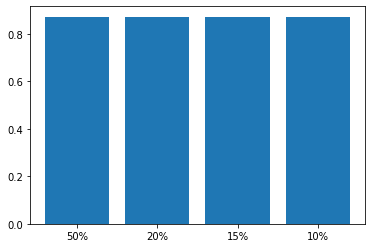

In [21]:
import matplotlib.pyplot as plt
plt.bar(
    [str(round(r['test_size'] * 100)) + "%" for r in results],
    [r['accuracy'] for r in results],
    bottom=0,
)

In [22]:
print(x_test.columns)

Index(['http_uri_/AVTransport_1.xml',
       'ssl_cipher_TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA', 'ssl_established_F',
       'proto_icmp',
       'http_uri_/msdownload/update/v3/static/trustedr/en/pinrulesstl.cab?9fd0fd9b8b472c10',
       'dns_RD_-', 'http_uri_/webmail/src/login.php', 'dns_rejected_-',
       'http_uri_/d/msdownload/update/others/2019/04/28701422_19fc1c232bf7eb4d3ddd097afebcaa3a0479d76c.cab',
       'http_user_agent_Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:5.0) Whistler/20110021 myibrow/5.0.0.0',
       ...
       'http_user_agent_Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; rv:49.0) Gecko/20100101 Firefox/49.0',
       'ssl_version_TLSv13', 'proto_tcp', 'dns_AA_F',
       'weird_name_TCP_ack_underflow_or_misorder',
       'http_uri_/upnp/control/ConnectionManager1',
       'http_uri_/c/msdownload/update/software/secu/2019/02/windows10.0-kb4483452-x64_f58d9b9ff95e2b686c4bc7666dbc45aadd151b0c.cab',
       'dst_ip_bytes',
       'http_uri_/MFEwTzBNMEswSTAJBgUrDgMCGgUABB

In [23]:
for c in x_train.columns:
    print(c)

http_uri_/AVTransport_1.xml
ssl_cipher_TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA
ssl_established_F
proto_icmp
http_uri_/msdownload/update/v3/static/trustedr/en/pinrulesstl.cab?9fd0fd9b8b472c10
dns_RD_-
http_uri_/webmail/src/login.php
dns_rejected_-
http_uri_/d/msdownload/update/others/2019/04/28701422_19fc1c232bf7eb4d3ddd097afebcaa3a0479d76c.cab
http_user_agent_Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:5.0) Whistler/20110021 myibrow/5.0.0.0
http_uri_/fwlink/?LinkID=252669&clcid=0x409
http_uri_/?C=S;O=D
dns_rcode
conn_state_RSTRH
weird_name_possible_split_routing
http_user_agent_Microsoft-WNS/10.0
http_uri_/filestreamingservice/files/0791715e-2de4-47f2-ba02-d980d28e51c3/pieceshash
http_user_agent_-
http_uri_/filestreamingservice/files/1f41d40e-6e49-42f0-a4dc-3d35029e2a5d?P1=1554315773&P2=402&P3=2&P4=D2MtshBIyXICLz+f8ls5Sa4mWcxA1B670oj1WRainhnd91v77n9XO6/xoc4QeEYZdwdKSG+6cFNvkBVYbJdXpw==
http_uri_/prod/9/9842fdea-4798-4143-b181-565964f5d454.devicemetadata-ms
ssl_subject_CN=*.events.data.micro